In [1]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pickle

DATADIR = "/content/drive/MyDrive/eye_resize(224,224)"
CATEGORIES = ['central', 'hemianopia','normal','quadratopia','superior','turnel']

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) )  # convert to array ,cv2.IMREAD_GRAYSCALE
        break  # we just want one for now so break
    break 

training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) ## convert to array ,cv2.IMREAD_GRAYSCALE
            new_array = cv2.resize(img_array, (32, 32))  # resize to normalize data size
            training_data.append([new_array, class_num])  # add this to our training_data

create_training_data()

print(len(training_data))

100%|██████████| 354/354 [01:08<00:00,  5.18it/s]

2348


In [3]:
#!pip install keras==2.2.4
#!pip install tensorflow==1.14.0

#import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import time

start = time.time()

model_history = []
acc = []

for i in range(5):
  print("Training fold:", i+1)
  #X, y = shuffle(X, y, random_state=0)
  X = []
  y = []

  for features,label in training_data:
      X.append(features)
      y.append(label)

  X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=True,test_size=0.20,stratify=y, random_state=42)

  x_train = np.asarray(X_train,dtype=np.float32)/255.0
  #print("image shape:",x_train[0].shape)
  y_train = tf.keras.utils.to_categorical(y_train, num_classes=7, dtype='float32')
  x_test = np.asarray(X_test,dtype=np.float32)/255.0
  #print("image shape:",x_test[0].shape)
  y_test2 = tf.keras.utils.to_categorical(y_test, num_classes=7, dtype='float32')
  #add dimentional
  x_train = x_train[...,np.newaxis]
  x_test2 = x_test[...,np.newaxis]

  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,1)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(7, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

  history = model.fit(x_train,y_train,validation_data=(x_test2,y_test2),batch_size=32,epochs=50)
  score=model.evaluate(x_test2,y_test2,verbose=0)
  print("accuracy = ",score[1])
  acc.append(score[1])
  model_history.append(history)

  end = time.time()

print(f"time taken = {end-start}")

Training fold: 1
Epoch 1/50
59/59 [==============================] - 30s 12ms/step - loss: 1.6069 - accuracy: 0.3381 - val_loss: 1.1766 - val_accuracy: 0.6064
Epoch 2/50
59/59 [==============================] - 0s 7ms/step - loss: 1.0724 - accuracy: 0.6230 - val_loss: 0.7906 - val_accuracy: 0.7723
Epoch 3/50
59/59 [==============================] - 0s 7ms/step - loss: 0.7964 - accuracy: 0.7449 - val_loss: 0.6362 - val_accuracy: 0.8064
Epoch 4/50
59/59 [==============================] - 0s 7ms/step - loss: 0.6550 - accuracy: 0.7875 - val_loss: 0.5125 - val_accuracy: 0.8511
Epoch 5/50
59/59 [==============================] - 0s 7ms/step - loss: 0.5474 - accuracy: 0.8307 - val_loss: 0.4287 - val_accuracy: 0.8787
Epoch 6/50
59/59 [==============================] - 0s 7ms/step - loss: 0.4678 - accuracy: 0.8541 - val_loss: 0.3590 - val_accuracy: 0.8809
Epoch 7/50
59/59 [==============================] - 0s 7ms/step - loss: 0.4376 - accuracy: 0.8642 - val_loss: 0.3333 - val_accuracy: 0.8957
E

In [4]:
print(x_train.shape)
print(y_train.shape)

(1878, 32, 32, 1)
(1878, 7)


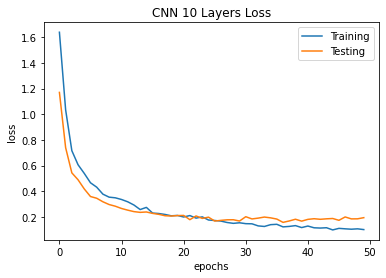

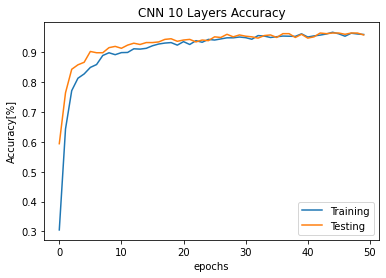

No handles with labels found to put in legend.


accuracy= 0.9587234020233154


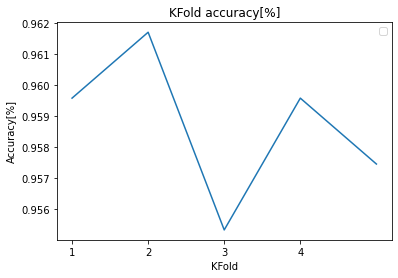

In [5]:

plt.plot(history.history['loss'], label = "Training") 
plt.plot(history.history['val_loss'], label = "Testing")
plt.title("CNN 10 Layers Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], label = "Training")
plt.plot(history.history['val_accuracy'], label = "Testing") 
plt.title("CNN 10 Layers Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy[%]")
plt.legend()
plt.show()

"""
plt.title('Train Accuracy vs Val Accuracy')
#plt.plot(model_history[0].history['accuracy'], label='Train Accuracy Fold 1', color='black')
#plt.plot(model_history[0].history['val_accuracy'], label='Val Accuracy Fold 1', color='black', linestyle = "dashdot")
#plt.plot(model_history[1].history['accuracy'], label='Train Accuracy Fold 2', color='red', )
#plt.plot(model_history[1].history['val_accuracy'], label='Val Accuracy Fold 2', color='red', linestyle = "dashdot")
#plt.plot(model_history[2].history['accuracy'], label='Train Accuracy Fold 3', color='green', )
#plt.plot(model_history[2].history['val_accuracy'], label='Val Accuracy Fold 3', color='green', linestyle = "dashdot")
#plt.plot(model_history[3].history['accuracy'], label='Train Accuracy Fold 3', color='orange', )
#plt.plot(model_history[3].history['val_accuracy'], label='Val Accuracy Fold 3', color='orange', linestyle = "dashdot")
plt.plot(model_history[2].history['accuracy'], label='Train Accuracy', color='blue', )
plt.plot(model_history[2].history['val_accuracy'], label='Val Accuracy', color='red', linestyle = "dashdot")
plt.legend()
plt.show()
"""

print('accuracy=',(acc[0]+acc[1]+acc[2]+acc[3]+acc[4])/5)

plt.title('KFold accuracy[%]')
plt.plot([1,2,3,4,5],acc)
#ax=plt.subplot(111)
#ax.set_xlim(1,5)
dim=np.arange(1,5,1)
plt.xlabel("KFold")
plt.ylabel("Accuracy[%]")
plt.xticks(dim)
plt.legend()
plt.show()


In [6]:
"""
import glob

dir2 = sorted(glob.glob('/content/drive/My Drive/Sakura program/Sakura Sciences(Nishizaki sensei & Leow senpai)/defect_dataset1/crazing/*'))  

for path in dir2:  
  img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img,(32,32))
  img = np.asarray(img,dtype=np.float32)/255.0 
  #img = img[...,np.newaxis]
  img = np.reshape(img,[1,32,32,1])

  pred =np.argmax(model.predict(img)[0])
  if pred == 0:
    print("The predict image is = crazing")
  elif pred == 1:
    print("The predict image is = inclusion")
  elif pred == 2:
    print("The predict image is = patches")
  elif pred == 3:
    print("The predict image is = pitted surface")
  elif pred == 4:
    print("The predict image is = rolled in scale")
  elif pred == 5:
    print("The predict image is = scratches")
"""

from sklearn.metrics import classification_report
predictions = model.predict(x_test2)
predictions[0]
np.argmax(predictions[0])


pred=[]
for i in range(470):
	predictions[i]
	A=np.argmax(predictions[i])
	pred.append(A)

print(classification_report(pred,y_test,target_names=CATEGORIES))



              precision    recall  f1-score   support

     central       0.90      0.94      0.92        77
  hemianopia       0.98      1.00      0.99        80
      normal       1.00      0.97      0.98        60
 quadratopia       1.00      0.94      0.97       102
    superior       0.92      1.00      0.96        76
      turnel       0.96      0.91      0.93        75

    accuracy                           0.96       470
   macro avg       0.96      0.96      0.96       470
weighted avg       0.96      0.96      0.96       470



In [10]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=y_test, y_pred=pred)

def plot_confusion_matrix(cm, classes,
    normalize=True,
    title='Confusion matrix',
    cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
   # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.9        0.         0.025      0.         0.         0.075     ]
 [0.         0.97560976 0.         0.02439024 0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.04819277 0.         0.         0.02409639 0.91566265 0.01204819]
 [0.01408451 0.         0.         0.02816901 0.         0.95774648]]


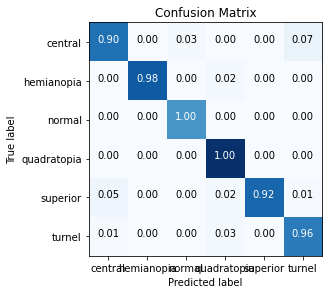

In [11]:
cm_plot_labels = ['central', 'hemianopia','normal','quadratopia','superior','turnel']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [13]:
#K.utils.plot_model(model,show_shapes=True)
model.summary()
model.save('vf.h5')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              